# Projet d'Apprentissage statistique en python

## Introduction
Notre but dans le présent travail est de mettre en oeuvre plusieurs techniques de programmation en python vue en cours ainsi que de faire de l'apprentissage statistique sur deux bases de données: projetTrain ayant 51381 individus et 127 variables. Et un second jeu de données projetValid ayant 8000 individus et 126 variables, la variable cible étant inexistente dans ce dernier jeu de données. Nous avons pour objectif principal de tester plusieurs modélisation sur le jeu de données et d'évaluer les performances de celles-ci. Pour y parvenir, nous allons diviser le premier jeu de données en deux: une partie d'apprentissage nommé T_train avec cible z_train et une partie de teste qu'on appelle T_test avec cible z_test.   

## 0) Importation des librairies

In [1]:
# Analyse des données
import pandas as pd
import os
import numpy as np
import random as rnd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# option d'impression
import numpy as np
np.set_printoptions(precision=3)

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## 1) Importation des données

In [2]:
path1="/Users/samegnikepgnou/CoursMachineLearning/projetTrain.csv"
path2="/Users/samegnikepgnou/CoursMachineLearning/projetValid.csv"
Train = pd.DataFrame.from_csv(path1)
Valid = pd.DataFrame.from_csv(path2)

In [3]:
print(Train.columns.values)

['Product_Info_1' 'Product_Info_2' 'Product_Info_3' 'Product_Info_4'
 'Product_Info_5' 'Product_Info_6' 'Product_Info_7' 'Ins_Age' 'Ht' 'Wt'
 'BMI' 'Employment_Info_1' 'Employment_Info_2' 'Employment_Info_3'
 'Employment_Info_4' 'Employment_Info_5' 'Employment_Info_6'
 'InsuredInfo_1' 'InsuredInfo_2' 'InsuredInfo_3' 'InsuredInfo_4'
 'InsuredInfo_5' 'InsuredInfo_6' 'InsuredInfo_7' 'Insurance_History_1'
 'Insurance_History_2' 'Insurance_History_3' 'Insurance_History_4'
 'Insurance_History_5' 'Insurance_History_7' 'Insurance_History_8'
 'Insurance_History_9' 'Family_Hist_1' 'Family_Hist_2' 'Family_Hist_3'
 'Family_Hist_4' 'Family_Hist_5' 'Medical_History_1' 'Medical_History_2'
 'Medical_History_3' 'Medical_History_4' 'Medical_History_5'
 'Medical_History_6' 'Medical_History_7' 'Medical_History_8'
 'Medical_History_9' 'Medical_History_10' 'Medical_History_11'
 'Medical_History_12' 'Medical_History_13' 'Medical_History_14'
 'Medical_History_15' 'Medical_History_16' 'Medical_History_17'
 'Me

### 1.1) Traitement de la base
Etant donné que la base de données Valid ne contient pas la colonne cible (seul le prof a connaissance de celle ci), nous commençons par ajouter une colonne target à la base Valid.

In [4]:
Valid["target"]=Valid["Medical_Keyword_48"]

In [5]:
Valid.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,target
Id,,,,,,,,,,,,,,,,,,,,,
70893,1,A8,26,0.076923,2,3,1,0.776119,0.654545,0.184100,...,0,0,0,0,0,0,0,0,0,0
20997,1,D2,26,0.076923,2,3,1,0.552239,0.818182,0.330544,...,0,0,0,0,0,0,0,0,1,1
29427,1,D3,10,0.230769,2,3,1,0.208955,0.636364,0.184100,...,0,0,0,0,0,0,0,0,0,0
45161,1,A1,26,0.256410,2,3,1,0.328358,0.745455,0.299163,...,0,0,0,0,0,0,0,0,0,0
71802,1,D3,26,0.282051,2,3,1,0.686567,0.781818,0.430962,...,0,0,1,0,0,0,0,0,0,0


In [6]:
 Train.head() 

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,target
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,1
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,1
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,1
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,1


In [7]:
Data = [Train, Valid]

In [8]:
Train.tail()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,target
Id,,,,,,,,,,,,,,,,,,,,,
79140,1,D4,26,0.307692,2,3,1,0.164179,0.690909,0.288703,...,0,0,0,0,0,0,0,0,0,0
79141,1,C1,26,0.076923,2,3,1,0.477612,0.654545,0.271967,...,0,0,0,0,0,0,0,0,0,1
79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,...,0,0,0,0,0,0,0,0,0,0
79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,...,0,0,0,0,0,0,0,0,0,1
79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,...,1,0,0,0,0,0,0,0,0,1


### Regard sur nos jeux de données

In [9]:
Train.info()
print('_'*40)
Valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51381 entries, 2 to 79145
Columns: 127 entries, Product_Info_1 to target
dtypes: float64(18), int64(108), object(1)
memory usage: 50.2+ MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 70893 to 12337
Columns: 127 entries, Product_Info_1 to target
dtypes: float64(18), int64(108), object(1)
memory usage: 7.8+ MB


In [10]:
Train.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,target
count,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,...,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000
mean,1.026002,24.416049,0.328934,2.006948,2.672097,1.042934,0.405657,0.707231,0.292492,0.469368,...,0.056772,0.010043,0.045678,0.010841,0.007824,0.013721,0.008700,0.019910,0.054456,0.328487
std,0.159142,5.068379,0.282703,0.083066,0.740471,0.289806,0.197115,0.074177,0.088967,0.122167,...,0.231409,0.099709,0.208789,0.103553,0.088107,0.116332,0.092867,0.139693,0.226917,0.469668
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,0.970149,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
Train.describe(include=['O'])

,Product_Info_2
count,51381
unique,19
top,D3
freq,12470


Ainsi Product_Info_2 est une variable qualitative ayant 19 modalités dont la plus représenté est D3 avec une frequence de 12470. Nous allons recoder celle-ci en 18 variables quantitatives.

In [12]:
for dataset in Data:
    for var in set(Train["Product_Info_2"]):
        if var != 'A7':
            dataset[var] = dataset["Product_Info_2"].apply(lambda x: 1 if x == var else 0)
        

In [13]:
Train.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,C3,D2,A8,C2,A6,A3,D4,C4,B1,D1
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,1,0,0,0
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,1,0,0,0,0,0,0,0,0


In [14]:
Valid.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,C3,D2,A8,C2,A6,A3,D4,C4,B1,D1
Id,,,,,,,,,,,,,,,,,,,,,
70893,1,A8,26,0.076923,2,3,1,0.776119,0.654545,0.184100,...,0,0,1,0,0,0,0,0,0,0
20997,1,D2,26,0.076923,2,3,1,0.552239,0.818182,0.330544,...,0,1,0,0,0,0,0,0,0,0
29427,1,D3,10,0.230769,2,3,1,0.208955,0.636364,0.184100,...,0,0,0,0,0,0,0,0,0,0
45161,1,A1,26,0.256410,2,3,1,0.328358,0.745455,0.299163,...,0,0,0,0,0,0,0,0,0,0
71802,1,D3,26,0.282051,2,3,1,0.686567,0.781818,0.430962,...,0,0,0,0,0,0,0,0,0,0


Nous pouvons maintenant supprimer la colonne Product_Info_2

In [15]:
# supprimer une  variable
for dataset in Data:
    del dataset["Product_Info_2"]


In [16]:
Valid.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,C3,D2,A8,C2,A6,A3,D4,C4,B1,D1
Id,,,,,,,,,,,,,,,,,,,,,
70893,1,26,0.076923,2,3,1,0.776119,0.654545,0.184100,0.329671,...,0,0,1,0,0,0,0,0,0,0
20997,1,26,0.076923,2,3,1,0.552239,0.818182,0.330544,0.425264,...,0,1,0,0,0,0,0,0,0,0
29427,1,10,0.230769,2,3,1,0.208955,0.636364,0.184100,0.345771,...,0,0,0,0,0,0,0,0,0,0
45161,1,26,0.256410,2,3,1,0.328358,0.745455,0.299163,0.445733,...,0,0,0,0,0,0,0,0,0,0
71802,1,26,0.282051,2,3,1,0.686567,0.781818,0.430962,0.613274,...,0,0,0,0,0,0,0,0,0,0


## Imputation des données manquantes
Nous remplaçons les données non disponibles des variables quantitatives de nos jeux de données par les médianes de celles-ci. D'autres méthodes d'imputations peuvent être explorés mais très couteux en temps de calcul. 

<span style="color:red">
il existe des méthodes pour faire ça plus vite : projetTrain=projetTrain.fillna(projetTrain.median())
</span>

In [17]:
# Remplacement par la médiane d'une variable quantitative
for dataset in Data:
    for var in dataset.columns.values:
        if dataset[var].isnull().sum()!=0:
            dataset[var]=dataset[var].fillna(dataset[var].median())

In [18]:
Valid["Medical_History_32"].head()

Id
70893    0.0
20997    0.0
29427    0.0
45161    0.0
71802    0.0
Name: Medical_History_32, dtype: float64

In [19]:
Train.dtypes["Product_Info_1"]

dtype('int64')

### 1.2) Separation de Train en échantillon d'apprentissage et de test 

Etant donné que la base de données Valid ne contenait pas la variable target nous faisons ici 
l'extraction des échantillons d'apprentissage et test sur la base Train.

In [20]:
# variables explicatives
T=Train.drop(["target"],axis=1)
# Variable à modéliser
z=Train["target"]
# Extractions
from sklearn.model_selection import train_test_split
T_train,T_test,z_train,z_test=train_test_split(T,z,test_size=0.2,random_state=11)

Attention: l'échantillon test des données est relativement petit, l'estimation de l'erreur de prévision est donc sujette à caution car probablement de grande variance. Il suffit de changer l'initialisation (paramètre random_state) et ré-exécuter les scripts pour s'en assurer.

### 1.3) Quelques fonctions utiles
Nous définissons ici deux fonctions utiles qui nous viennent du github de Monsieur Romain Jouin et qui vont nous permettre en ce qui concerne la première d'afficher la matrice de confusion sur les données de test et d'evaluer la qualité de la classification. La seconde nous permet de quatifier à travers un outil beaucoup pertinent en ce sens qu'il permet de comparer différent type de mdèles, les prefomance de nos modèles.

In [21]:
def draw_confusion_matrix(y_test, predictions, title):
    """
    Créé et affiche la matrice de confusion des données de Y_test et de celles sur 
    lesquelles on a fait la prédiction.
    Permet d'évaluer la qualité de la classification souhaitée.
    Plus les valeurs diagonales sont élevées, plus le classifieur prédit correctement.
    """
    from sklearn.metrics import confusion_matrix,accuracy_score
    import matplotlib.pyplot as plt
    cm    = confusion_matrix(y_test, predictions)
    accur = accuracy_score  (y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f) for [%s]'%(accur,title))
    plt.colorbar ()
    plt.show     ()

In [22]:
def draw_roc_curve(fitted_c, x_test, y_test, title):
    """
    Créé et affiche la courbe ROC des données de test X et Y selon un classifieur.
    Permet de représenter l'évolution de la vitesse d'apprentissage du classifieur.
    Taux de vrais-positifs en fonction du taux de faux-négatif.
    Plus l'aire sous la courbe est grande, plus le classifieur est idéal.
    """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    c                                        = fitted_c
    probas                                   = c.predict_proba(x_test)
    false_positive_rate, recall_, thresholds = roc_curve(y_test, probas[:,1])
    roc_auc                                  = auc(false_positive_rate, recall_)
    
    plt.title  ('ROC %.2f %s'%(roc_auc, title))
    plt.legend (loc="lower right")
    plt.plot   ([0,1],[0,1], "r--")
    plt.plot   (false_positive_rate, recall_, 'b', label='AUC = %.2f'%roc_auc)
    plt.xlim   ([0.0,1.1])
    plt.ylim   ([0.0,1.1])
    plt.ylabel ('Recall')
    plt.xlabel ('Fall-out')
    plt.show()

## 2) Les classifieurs de Scikit-learn
Tous les algorithmes et méthodes de Scikit-learn se présentent sous la forme d'une combinaison de 3 "interfaces": estimation pour ajuster des modèles, prévision pour de nouvelles observations, transformation pour convertir des données.

Juste un résumé rapide des paramètres que nous allons énumérer ici pour l'exhaustivité,

n_jobs: Nombre de cœurs utilisés pour le processus d'entraînement. Si la valeur est -1, tous les cœurs sont utilisés.

n_estimators: Nombre d'arbres de classification dans votre modèle d'apprentissage (défini sur 10 par défaut)

max_depth: Profondeur maximum de l'arbre, ou combien un noeud devrait être développé. Méfiez-vous si un nombre trop élevé courrait le risque de surapprentissage comme on ferait pousser l'arbre trop profond

### 2.1)  k plus proches voisins
### Estimation

Nous faisons ci-dessous une cross-validation pour déterminer le nombre de voisin à prendre en compte.

In [54]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
param=[{"n_neighbors":list(range(1,15))}]
knnF = GridSearchCV(KNeighborsClassifier(),
   param,cv=5,n_jobs=-1)
knnF_Opt=knnF.fit(T_train, z_train)
# paramètre optimal
knnF_Opt.best_params_["n_neighbors"]

12

In [55]:
# Erreur sur l'échantillon test
1-knnF_Opt.score(T_test, z_test)

0.32256495086114623

In [56]:
# Importation de la fonction
from sklearn.neighbors import KNeighborsClassifier  
# Détermination des paramètres et définition de l'estimateur
knnF = KNeighborsClassifier(n_neighbors=12)

# Apprentissage ou estimation du modèle sur l'échantillon d'apprentissage 
# mais il ne se passe rien  dans le cas de *k*-nn avant en dehors de la phase de prévision. 
knnF.fit(T_train, z_train)
# Les options de cet algorithmes:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

### Prévision
Prévision de la classe de l'échantillon test

In [57]:
print(knnF.predict(T_test))

[0 0 0 ..., 0 0 0]


Ou de la probabilité des classes.

In [58]:
print(knnF.predict_proba(T_test))

[[ 1.     0.   ]
 [ 0.5    0.5  ]
 [ 0.667  0.333]
 ..., 
 [ 0.917  0.083]
 [ 0.583  0.417]
 [ 0.5    0.5  ]]


In [59]:
# prévision de l'échantillon test
z_pred = knnF.predict(T_test)
# matrice de conprint(knnF.predict(T_test))fusion
table=pd.crosstab(z_test,z_pred)
print(table)

col_0      0     1
target            
0       5618  1250
1       2065  1344


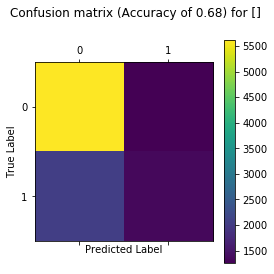

In [60]:
draw_confusion_matrix(z_test, z_pred, "")

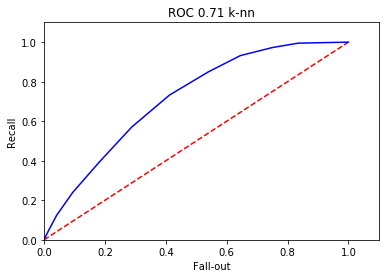

In [61]:
# Courbe ROC des données de T_test  et z_test selon le classifieur k-nn
draw_roc_curve(knnF, T_test, z_test, "k-nn")

Le modèle k plus proches voisins  donne une efficacité de prédiction sur le jeu de données test égal à 0.68 et un AUC égal à 0.71. Il est utile de regarder d'autres modèles qui son généralement plus performantes.

## 2.2) Régression Logistique
Cette ancienne méthode reste toujours très utilisée. D'abord par habitude mais aussi par efficacité pour le traitement de données très volumineuses lors de l'estimation de très gros modèles (beaucoup de variables) notamment par exemple pour les données de notre étude.

La prévision de la variable target, variable binaire des données "Train", se prêtent à une régression logistique. Les versions pénalisées (ridge, lasso, elastic net, lars) du modèle linéaire général sont les algorithmes les plus développés dans Scikit-learn au détriment de ceux plus classiques (forward, backward, step-wise) de sélection de variables en optimisant un critère de type AIC. Une version lasso et une version Ridge de la régression logistique sont testées sur nos jeux de données afin d'introduire la sélection automatique des variables.


### 2.2.1) Optimisation Lasso


In [96]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
param=[{"C":[1,5,7,10,12,15]}]
logitLasso = GridSearchCV(LogisticRegression(penalty="l1"),
   param,cv=5,n_jobs=-1)
Model_logitOpt=logitLasso.fit(T_train, z_train)
# paramètre optimal
Model_logitOpt.best_params_["C"]

1

Estimation de l'erreur de prévision par le modèle "optimal".

In [67]:
# Erreur sur l'échantillon test
1-Model_logitOpt.score(T_test, z_test)

0.17378612435535667

Petit souci supplémentaire, l'objet produit par GridSearchCV ne connaît pas l'attribut .coef_. Il faut donc ré-estimer le modèle pour connaître les coefficients.

In [136]:
# Estimation avec le paramètre optimal et coefficients
#LogisticRegression(penalty="l1",C=Model_logitOpt.best_params_['C']).fit(T_train, z_train).coef_

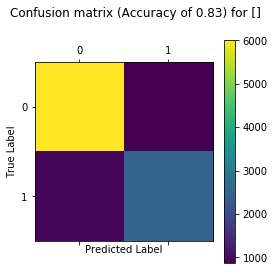

In [97]:
draw_confusion_matrix(z_test, logitLasso.predict(T_test), "")

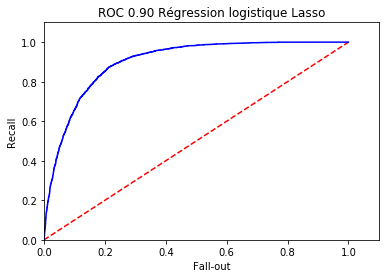

In [98]:
# Courbe ROC des données de T_test  et z_test selon le classifieur logistic
draw_roc_curve(logitLasso, T_test, z_test, "Régression logistique Lasso")

On remarquons que le modèle de regréssion logistique avec pénalisation Lasso donne une efficacité de prédiction sur le jeu de données test égal à 0.83 et un AUC égal à 0.90.

### 2.2.2) Optimisation Ridge

In [91]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
param=[{"C":[1,5,7,10,12,15]}]
logitRidge = GridSearchCV(LogisticRegression(penalty="l2"),
   param,cv=5,n_jobs=-1)
Model_logitOpt=logitRidge.fit(T_train, z_train)
# paramètre optimal
Model_logitOpt.best_params_["C"]

7

Estimation de l'erreur de prévision par le modèle "optimal".

In [92]:
# Erreur sur l'échantillon test
1-Model_logitOpt.score(T_test, z_test)

0.17359151503357007

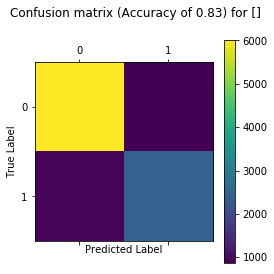

In [93]:
draw_confusion_matrix(z_test, Model_logitOpt.predict(T_test), "")

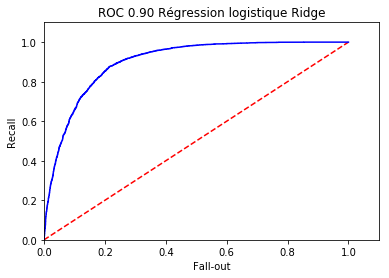

In [95]:
# Courbe ROC des données de T_test  et z_test selon le classifieur logistic Ridge
draw_roc_curve(Model_logitOpt, T_test, z_test, "Régression logistique Ridge")

On remarquons que le modèle de regréssion logistique avec pénalisation Ridge fait aussi bien que la pénalisation Lasso avec une efficacité de prédiction sur le jeu de données test égal à 0.83 et un AUC égal à 0.90.

## 2.3) Arbre de decision

### 2.3.1) Implementation
Les arbres binaires de décision (CART: classification and regression trees) s'appliquent à tous types de variables. La complexité du modèle est gérée par deux paramètres : max_depth, qui détermine le nombre max de feuilles dans l'arbre, et le nombre minimales min_samples_split d'observations requises pour rechercher une dichotomie.

### 2.3.2) Modélisation
Estimation de l'arbre complet.

In [69]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
digit_tree=tree.fit(T_train, z_train) 
# Estimation de l'erreur de prévision
1-digit_tree.score(T_test,z_test)

0.21426486328695149

Optimisation du paramètre de complexité du modèle par validation croisée en cherchant l'erreur minimale sur une grille de valeurs du paramètre avec cv=5-fold cross validation et n_jobs=-1 pour une exécution en parallèle utilisant tous les processeurs sauf 1. Remarquons ici que, comme la validation croisée est aléatoire et un arbre un modèle instable, deux exécutions successives ne donnent pas nécessairement le même résultat.

In [27]:
from sklearn.model_selection import GridSearchCV
param=[{"max_depth":list(range(2,10))}]
Model_tree= GridSearchCV(DecisionTreeClassifier(),param,cv=5,n_jobs=-1)
Model_treeopt=Model_tree.fit(T_train, z_train)
# paramètre optimal
Model_treeopt.best_params_

{'max_depth': 9}

La valeur "optimale" du paramètre reste trop importante pour la lisibilité de l'arbre. Une valeur plus faible est utilisée.

In [28]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-Model_tree.score(T_test,z_test)

0.17592682689500827

Notons ici une amélioration de l'erreur.

In [29]:
# prévision de l'échantillon test
z_pred = Model_treeopt.predict(T_test)
# matrice de confusion
table=pd.crosstab(z_test,z_pred)
print(table)

col_0      0     1
target            
0       5636  1232
1        576  2833


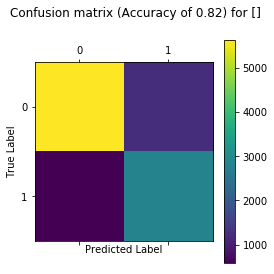

In [30]:
draw_confusion_matrix(z_test, Model_treeopt.predict(T_test), "")

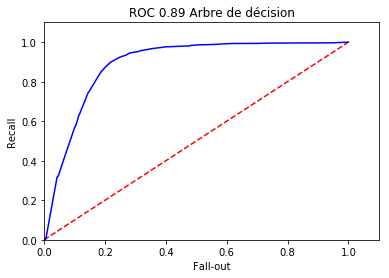

In [31]:
# Courbe ROC des données de T_test  et z_test selon l'arbre de décision'
draw_roc_curve(Model_treeopt, T_test, z_test, "Arbre de décision")

Notre modèle d'arbre de décision donne une efficacité de prédiction sur le jeu de données test égal à 0.82 et un AUC égal à 0.89. Donc cette modélisation fait moins bien sur nos jeux de données que les modèles de regressions logistiques présentés plus haut. 

Tracer l'arbre avec le logiciel Graphviz.

In [48]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydot
#import pydotplus
tree=DecisionTreeClassifier(max_depth=Model_treeopt.best_params_['max_depth'])
tree.fit(T_train,z_train)
dot_data = StringIO() 
export_graphviz(tree, out_file=dot_data) 
graph=pydot.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("treeOpt.pdf")
#Image(filename="treeOpt.pdf")

### Importances des variables dans le modèle d'arbre de décision
Nous faisons resortir ici les 20 variables qui influencent le plus la variable target. elles sont énumérés par ordre décroissante d'importance. Pour faire simple, plus elle est utilisée "haut" dans l'arbres, plus cette variable est importante.

In [28]:
tree=DecisionTreeClassifier(max_depth = 9)
digit_tree=tree.fit(T_train, z_train)
# Importance décroissante des variables
importances = digit_tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(20):
    print(T_train.columns[indices[f]], importances[indices[f]])

BMI 0.390624123476
Medical_History_23 0.171908577198
Medical_History_4 0.155110349823
Medical_History_15 0.0595085487949
Product_Info_4 0.0449891801663
Medical_Keyword_3 0.027243814149
Wt 0.0260605306995
Ins_Age 0.0220306714972
InsuredInfo_6 0.0164275619816
Medical_History_30 0.0110541221201
Medical_Keyword_15 0.0109120652786
Medical_History_24 0.00913614648545
InsuredInfo_2 0.00632298794719
Medical_Keyword_23 0.00473178363535
Medical_History_1 0.00423626784759
Family_Hist_3 0.00377787811376
Medical_Keyword_41 0.00369844331248
Employment_Info_6 0.00259276100496
Medical_History_2 0.00226635340169
Family_Hist_4 0.00202224082461


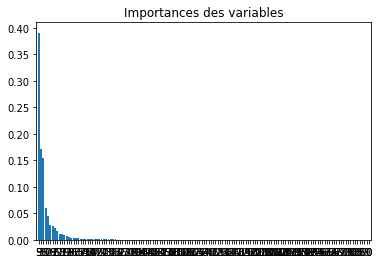

In [29]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(T_train.shape[1]), importances[indices])
plt.xticks(range(T_train.shape[1]), indices)
plt.xlim([-1, T_train.shape[1]])
plt.show()

## 2.4) Random forest
L'algorithme d'agrégation de modèles le plus utilisé est celui des forêts aléatoires (random forest) de Breiman (2001) ce qui ne signifie pas qu'il conduit toujours à la meilleure prévision.

Bien que cet algorithme soit l'un des algorithmes non linéaires les plus aisés à comprendre, le paramétrer n'est pas simple et nous ne pouvons être certain en tant que debutant de bien le faire. Et pour cause, il dispose d'une multiplicité de paramètres. Son implementation dans scikit-learn fait appel à pas moins de 14 paramètres dont les plus important sont:
##### n_estimators 
qui est le nombre d'arbres différents à entrainer,  
##### criterion 
qui est le critère statistique pour couper les feuilles en cours de construction (Gini pour la classification).
##### max_depth 
qui est la profondeur maximale de chaque arbres qui est très important qui dépend du niveau d'interaction entre les variables,
##### max_features
qui est le paramètre que nous optimiserons, c'est le nombre de variables tirées aléatoirement pour la recherche de la division optimale d'un noeud. 
Par défaut, il prend la valeur $\frac{p}{3}$ en régression et $\sqrt{p}$ en discrimination où $p$ est le nombre de variables.

In [137]:
# optimisation de max_features
param=[{"max_features":list(range(2,15))}]
Model_rf= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=5,n_jobs=-1)
Model_rfOpt=titan_rf.fit(T_train, z_train)
# paramètre optimal
Model_rfOpt.best_params_

{'max_features': 12}

In [138]:
# erreur de prévision sur le test
1-Model_rfOpt.score(T_test,z_test)

0.16230417436995237

In [140]:
# prévision
z_chap = Model_rfOpt.predict(T_test)
# matrice de confusion
table=pd.crosstab(z_test,z_chap)
print(table)

col_0      0     1
target            
0       6107   761
1        907  2502


In [142]:
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, max_features=12, max_leaf_nodes=None,
                                bootstrap=True, oob_score=True)
# apprentissage
forest = forest.fit(T_train,z_train)

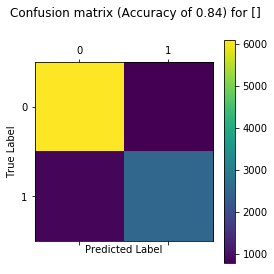

In [143]:
draw_confusion_matrix(z_test, forest.predict(T_test), "")

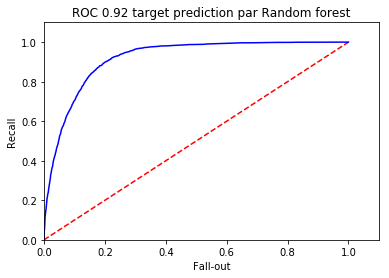

In [144]:
# Courbe ROC des données de T_test  et z_test selon le classifieur Random Forest
draw_roc_curve(forest, T_test, z_test, "target prediction par Random forest")

Notre modèle Random Forest donne une efficacité de prédiction sur le jeu de données test égal à 0.84 et un AUC égal à 0.92. Donc cette modélisation est bien plus performante sur nos jeux de données que les modèles précédent.

### Importance des variables dans le modèle Random Forest
Nous faisons resortir ici les 20 variables qui influencent le plus la variable target. elles sont énumérés par ordre décroissante d'importance. Pour faire simple, plus est utilisée par un nombre significatif d'arbres et plus elle est utilisée "haut" dans les arbres, plus cette variable est importante. Par exemple, en assurance, on peut s'attendre à ce que l'âge et le sexe, deux critères métier très discriminants, se retrouvent parmi les variables les plus importantes du modèles basé sur un algorithme random forest.

In [26]:
rf= RandomForestClassifier(n_estimators=500,max_features=12)
Forest=rf.fit(T_train, z_train)
# Importance décroissante des variables
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(20):
    print(T_train.columns[indices[f]], importances[indices[f]])

BMI 0.135999694981
Wt 0.0965818519943
Medical_History_23 0.0406500864191
Medical_History_15 0.0402061360678
Ins_Age 0.0373351423149
Medical_History_4 0.0373181914567
Product_Info_4 0.0371574187722
Medical_Keyword_15 0.0356918958549
Employment_Info_1 0.0290175224198
Family_Hist_4 0.0280734448158
Ht 0.0274779778849
Medical_History_1 0.0251174396305
Medical_History_2 0.0242610654503
Employment_Info_6 0.0238852287516
Family_Hist_2 0.0233777654914
Family_Hist_3 0.0194422370527
Insurance_History_5 0.0187546746216
InsuredInfo_3 0.0157637354101
InsuredInfo_6 0.0147641325037
Family_Hist_5 0.0142310318205


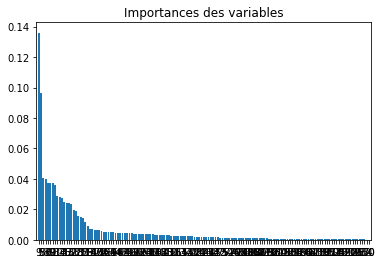

In [27]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(T_train.shape[1]), importances[indices])
plt.xticks(range(T_train.shape[1]), indices)
plt.xlim([-1, T_train.shape[1]])
plt.show()

## 2.5) Analyse de l'influence des variables les plus importantes sur la cible
Lorsque nous observons les section importance des variables dans les modèles Arbre de décision et Random Forest, il est évident que les variables 'BMI', 'Wt', 'Medical_History_23' compte parmi les plus importante de nos jeux de données. Nous nous proposons dans la suite d'étudier l'influence de celles-ci sur la variable cible 'target'.

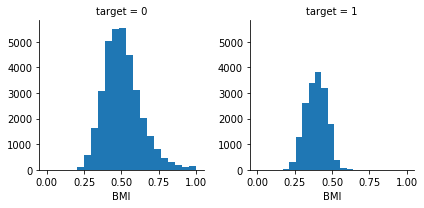

In [37]:
g = sns.FacetGrid(Train, col='target')
g.map(plt.hist, 'BMI', bins=20)

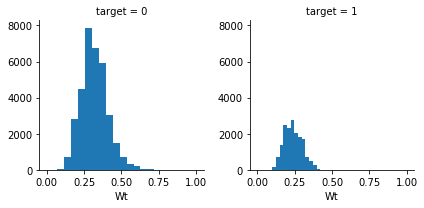

In [38]:
g = sns.FacetGrid(Train, col='target')
g.map(plt.hist, 'Wt', bins=20)

Enfin, nous générons quelques paires de points pour observer la distribution des données d'une caractéristique à l'autre(pour quelques variables les plus importantes). Encore une fois, nous utilisons Seaborn pour y arriver.

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


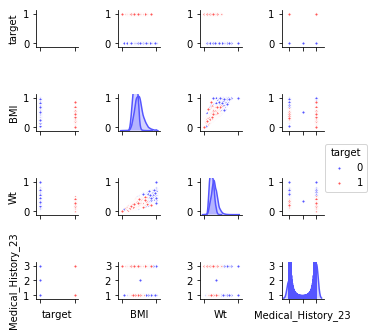

In [43]:
g = sns.pairplot(Train[[u'target', u'BMI', u'Wt', u'Medical_History_23']], 
                 hue='target', palette = 'seismic',size=1.2,diag_kind = 'kde',
                 diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

### Scatter plot 
On trace sur un graphique les point (Wt,BMI) en mettant target=0 et target=1 avec des couleurs différentes (violet pour target=0 et bleu pour target=1).

<span style="color:red">
Dommage de ne pas faire un hue ici
</span>

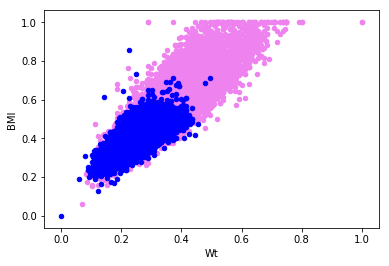

In [48]:
cible_0 = Train["target"]==0
cible_1 = Train["target"]==1
ax = Train[cible_0].plot.scatter(x="Wt", y="BMI", color="violet")
Train[cible_1].plot.scatter(x="Wt", y="BMI", color="blue", ax=ax)


Il est facile de voir à travers ce graphique que les couples (Wt,BMI) tels que Wt<0.5 et BMI< 0.6 sont ceux des individus qui atteignent le plus souvent l'objectif. 

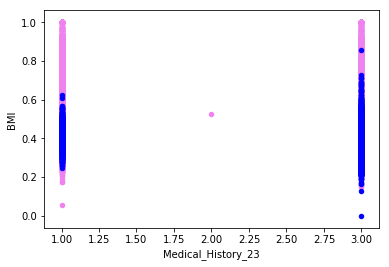

In [46]:
cyclistes.groupby(["est_adulte"])["age"].mean()cible_0 = Train["target"]==0
cible_1 = Train["target"]==1
ax = Train[cible_0].plot.scatter(x="Medical_History_23", y="BMI", color="violet")
Train[cible_1].plot.scatter(x="Medical_History_23", y="BMI", color="blue", ax=ax)

In [23]:
Train.groupby(["target"])["BMI"].mean()

target
0    0.506550
1    0.393359
Name: BMI, dtype: float64

La moyenne de la variable BMI pour les individus qui atteignent la cible est 0.393359. elle est inférieur à celle des individus pour lesquels la cible n'est pas atteinte. Ceci est très bien visible à travers le graphique ci-dessous

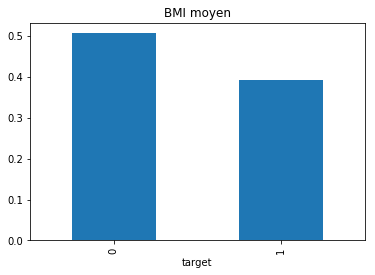

In [24]:
%matplotlib inline 
Train.groupby(["target"])["BMI"].mean().plot.bar(title="BMI moyen")

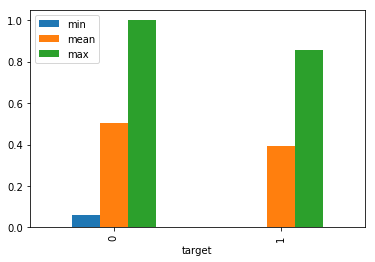

In [25]:
grouped  = Train.groupby(["target"])["BMI"]
grouped.agg(["min", "mean",  "max"]).plot.bar()

## 2.6) Gradient boosting
Le gradient boosting est un algorithme complexe dont le paramètrage n'est pas aisé. Par rapport au random forest, il présente l'incovenient d'être itératif et donc de ne pas être un candidat idéal à la parallèlisation. Autrement dit, la recherche des bons paramètres est "très très" longue. les paramètres les plus importants sont:  
##### loss 
qui est la fonction de coût utilisé pour la descente du gradient,  
##### Learning_rate 
qui définit le pas à chaque descente de gradient,  
##### n_estimators 
qui est tout simplement le nombre d'estimateurs ou d'itération qu'on fera,  
##### max_depth 
qui est la profondeur des arbres entrainés(ici peu profond que dans random forest). Dans notre étude nous optimiserons le paramètre learning uniquement, la faute à la puissance de calcul.

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Optimisation de deux paramètres
paramGrid = [
  {'n_estimators': [500], 'learning_rate': [0.1,0.2,0.3]}
 ]
gbmC= GridSearchCV(GradientBoostingClassifier(),paramGrid,cv=5,n_jobs=-1)
gbmOpt=gbmC.fit(T_train, z_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" 
      % (1. - gbmOpt.best_score_,gbmOpt.best_params_))

Meilleur score = 0.155386, Meilleur paramètre = {'learning_rate': 0.1, 'n_estimators': 500}


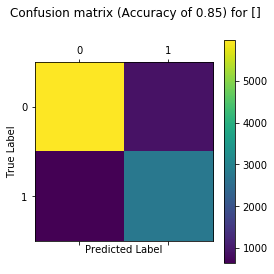

In [52]:
draw_confusion_matrix(z_test, gbmOpt.predict(T_test), "")

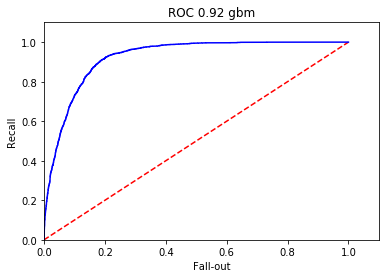

In [54]:
# Courbe ROC des données de T_test  et z_test selon le classifieur gbm
draw_roc_curve(gbmOpt, T_test, z_test, "gbm")

Notre modèle Gradient boosting donne une efficacité de prédiction sur le jeu de données test égal à 0.85 et un AUC égal à 0.92. Donc cette modélisation fait aussi bien que le modèle Random Forest.

# Conclusion
Au final, nous pour retenir pour nos données deux modèlisations possibles: qui resortent tous de bonne performance en terme de prédiction de la variable cible "target". Nous pensons qu'on peut encore faire mieux en terme de performance avec ces deux modélisation notamment en élargisant un peu plus les espace de sélection de nos variables.